In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PC_SL import *

In [18]:
df_asia = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat")
df_child = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat")
df_insurance = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat")
df_water = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\Water_1000.dat")
df_alarm = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat")
df_barley = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat")
df_hailfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hailfinder.dat")
df_hepar2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat")
df_andes = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\andes.dat")
df_link = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link.dat")
df_pathfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\pathfinder.dat")
df_munin2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\munin2.dat")

In [19]:
def F_score(u):
    #j_0#
    '''
    u = hybrid graph
    v = real graph
    '''
    u_frozenset = []
    for i in u.adjacency.items():
        if i[1].X >= 1:
            u_frozenset.append(i[0])
    hybrid = [list(x) for x in u_frozenset]
    ##
    
    T_frozenset = []
    for i in T.adjacency.items():
        if i[1].X >= 1:
            T_frozenset.append(i[0])
    real = [list(x) for x in T_frozenset]
    
    #Finding TP, FP, FN#
    TP = [x for x in hybrid if x in (y for y in real)]
    FP = [x for x in hybrid if x not in (y for y in real)]
    FN = [x for x in real if x not in (y for y in hybrid)]
    
    # F_score#
    F_score = (2 * len(TP)) / (2 * len(TP) + len(FP) + len(FN))
    print('False Positive = ' ,FP)
    print('False Negative = ' ,FN)
    return F_score

In [20]:
df_test = csv_format_discrete(r'barley_testing.dat')

### GOBNILP

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -122598.28798551095
**********
Age<- -8830.425343756928
BirthAsphyxia<-Disease -3154.0124476783676
Disease<-Age -13954.069261010489
CO2<-LungParench -6937.123116063318
LungParench<-Disease -6426.278654803085
CO2Report<-CO2 -3237.7114459228615
CardiacMixing<-Disease -6090.973628622938
ChestXray<-LungFlow,LungParench -8025.395670361249
LungFlow<-Disease -6421.6554322478405
DuctFlow<-Disease -4944.544142775136
Grunting<-LungParench,Sick -3794.558234765471
Sick<-Age,Disease -5675.85835849982
GruntingReport<-Grunting -3652.1960002436826
HypDistrib<-CardiacMixing,DuctFlow -2227.304330680963
HypoxiaInO2<-CardiacMixing,LungParench -7252.288945864151
LVH<-Disease -3187.5318292489537
LVHreport<-LVH -2261.839690135719
Low

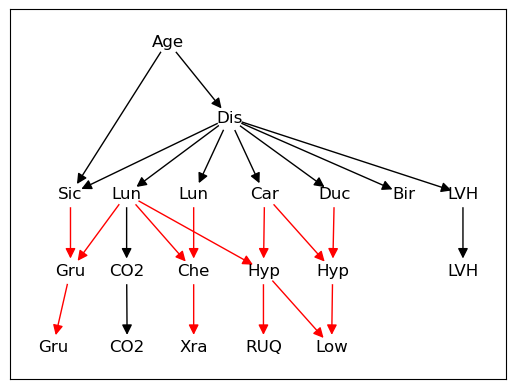

the time taken to learn the network is: 22.47955846786499 seconds
CPU times: total: 23 s
Wall time: 22.5 s


In [35]:
%%time
toc = time.time()

'''
score-based algorithm
'''
T = Gobnilp()
#score phase##
T.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat", palim=6)
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
#started at 3:45

### Hybrid 

In [38]:
%%time
'''
restrict phase
'''
toc = time.time()
k = PC_SL(df_child, 2, 0.05)
tic = time.time()
print('the time taken to restrict edges is', tic - toc, 'seconds')

the number of restricted edges is : 165
the time taken to restrict edges is 253.21761178970337 seconds
CPU times: total: 4min 10s
Wall time: 4min 13s


In [29]:
k

[('BirthAsphyxia', 'CO2'),
 ('BirthAsphyxia', 'ChestXray'),
 ('BirthAsphyxia', 'Grunting'),
 ('BirthAsphyxia', 'LowerBodyO2'),
 ('BirthAsphyxia', 'CO2Report'),
 ('BirthAsphyxia', 'XrayReport'),
 ('BirthAsphyxia', 'GruntingReport'),
 ('BirthAsphyxia', 'LungFlow'),
 ('BirthAsphyxia', 'Sick'),
 ('HypDistrib', 'CO2Report'),
 ('CO2', 'LowerBodyO2'),
 ('CO2', 'RUQO2'),
 ('Grunting', 'LowerBodyO2'),
 ('LVHreport', 'LowerBodyO2'),
 ('LVHreport', 'RUQO2'),
 ('LVHreport', 'CO2Report'),
 ('LVHreport', 'GruntingReport'),
 ('LVHreport', 'Sick'),
 ('LowerBodyO2', 'CO2Report'),
 ('LowerBodyO2', 'LVH'),
 ('LowerBodyO2', 'LungParench'),
 ('LowerBodyO2', 'Sick'),
 ('RUQO2', 'CO2Report'),
 ('RUQO2', 'GruntingReport'),
 ('RUQO2', 'Age'),
 ('RUQO2', 'LVH'),
 ('RUQO2', 'Sick'),
 ('CO2Report', 'LVH'),
 ('GruntingReport', 'LVH'),
 ('BirthAsphyxia', 'HypDistrib'),
 ('BirthAsphyxia', 'HypoxiaInO2'),
 ('BirthAsphyxia', 'LVHreport'),
 ('BirthAsphyxia', 'RUQO2'),
 ('BirthAsphyxia', 'Age'),
 ('BirthAsphyxia', 'LVH'

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -122598.28798551095
**********
Age<-Disease,Sick -7558.556876325645
Disease<- -15045.973990886967
Sick<-Disease -5855.822096054624
BirthAsphyxia<-Disease -3154.0124476783676
CO2<-LungParench -6937.123116063318
LungParench<-Disease -6426.278654803085
CO2Report<-CO2 -3237.7114459228615
CardiacMixing<-Disease -6090.973628622938
ChestXray<-LungFlow,LungParench -8025.395670361249
LungFlow<-Disease -6421.6554322478405
DuctFlow<-Disease -4944.544142775136
Grunting<-LungParench,Sick -3794.558234765471
GruntingReport<-Grunting -3652.1960002436826
HypDistrib<-CardiacMixing,DuctFlow -2227.304330680963
HypoxiaInO2<-CardiacMixing,LungParench -7252.288945864151
LVH<-Disease -3187.5318292489537
LVHreport<-LVH -2261.8396901357

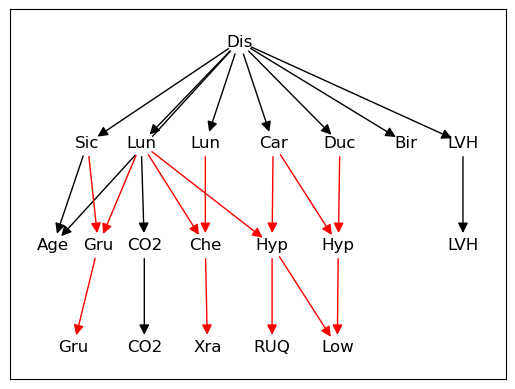

the time taken to learn the graph 5.147664308547974 seconds
False Positive =  [['HypoxiaInO2', 'LungParench']]
False Negative =  []
The F-score is  0.9795918367346939
CPU times: total: 6.12 s
Wall time: 5.15 s


In [36]:
%%time
tic = time.time()
'''
score phase
'''
m = Gobnilp()
for i in k:
    m.add_forbidden_adjacency((i[0], i[1]))
                              
m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat", palim=3)

# m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link_testing.csv")
toc = time.time()
print('the time taken to learn the graph', toc - tic, 'seconds')
print('The F-score is ', F_score(m))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -133285.69537994266
**********
Accident<-Antilock,DrivQuality -6079.102108939966
Antilock<-MakeModel,VehicleYear -1586.0309961559178
DrivQuality<-DrivingSkill,RiskAversion -2523.469801236344
Age<-GoodStudent,SocioEcon -8673.52975427363
GoodStudent<-SocioEcon -1760.9139673253376
SocioEcon<-OtherCar -10397.482992070087
Airbag<-MakeModel,VehicleYear -2385.748171458923
MakeModel<-SocioEcon -9303.966738433664
VehicleYear<-SocioEcon -5121.3674866970105
AntiTheft<-RiskAversion,SocioEcon -2691.3795373563407
RiskAversion<-Age,SeniorTrain -9859.077367343212
CarValue<-MakeModel,Mileage,VehicleYear -5960.044309394354
Mileage<-Accident,DrivQuality -11943.238610540582
Cushioning<-Airbag,RuggedAuto -7348.7360441247365
RuggedA

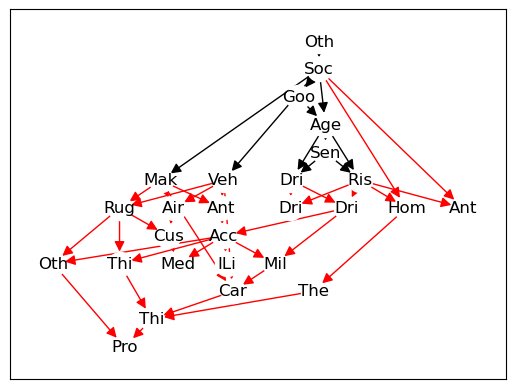

the time taken to learn the network is: 19.58951497077942 seconds
CPU times: total: 36.1 s
Wall time: 19.6 s


In [16]:
F_score(m)

False Positive =  [['Fourteen', 'Eight'], ['Twentyfive', 'Eight'], ['Sixteen', 'Fifteen'], ['Twentyfour', 'Fifteen'], ['Thirtysix', 'Forty'], ['Thirtynine', 'Fortyfive'], ['Thirtyfive', 'Fortyfour'], ['Sixteen', 'Fortyone'], ['Fortysix', 'Fortyseven'], ['Thirtyeight', 'Fortyseven'], ['Thirtyeight', 'Fortysix'], ['Thirtysix', 'Fortysix'], ['Twentyfive', 'Fortytwo'], ['Thirteen', 'Nine'], ['Thirtyfive', 'Nineteen'], ['Thirtysix', 'Nineteen'], ['Ten', 'Six'], ['Twelve', 'Six'], ['Thirtyeight', 'Thirtyfive'], ['Twentyfive', 'Twentythree']]
False Negative =  [['Fortythree', 'Nine'], ['Fortythree', 'Thirtytwo'], ['Thirtyfive', 'Seventeen']]


0.7889908256880734

### Alarm - GOBNILP

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -105226.51191678003
**********
ANAPHYLAXIS<- -578.587070487134
ARTCO2<-VENTALV -1816.018107669981
VENTALV<-INTUBATION,VENTLUNG -1785.1568955858384
BP<-CO,TPR -4927.804606748883
TPR<-ANAPHYLAXIS -10794.813215814676
CO<-HR,STROKEVOLUME -2678.9117199075117
CATECHOL<-ARTCO2,TPR -1521.301873422577
STROKEVOLUME<-HYPOVOLEMIA,LVFAILURE -4437.288938131547
HR<-CATECHOL -3744.599767304855
CVP<-LVEDVOLUME -3006.615302132195
LVEDVOLUME<-HYPOVOLEMIA,LVFAILURE -3613.5057310384145
DISCONNECT<- -3295.031743080661
ERRCAUTER<- -3222.5768222310726
ERRLOWOUTPUT<- -1972.2788189759885
EXPCO2<-ARTCO2,VENTLUNG -1772.659127224848
VENTLUNG<-INTUBATION,KINKEDTUBE,VENTTUBE -3618.0085247885727
FIO2<- -1888.628670533668
HISTORY<-LVFAILURE -6

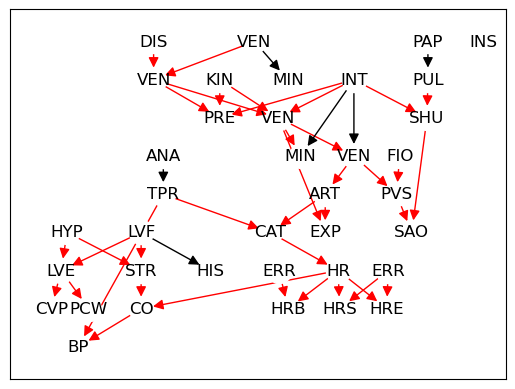

the time taken to learn the network is: 217.3773899078369 seconds
CPU times: total: 11min 4s
Wall time: 3min 37s


In [40]:
%%time
toc = time.time()

'''
score-based algorithm
'''
T = Gobnilp()
#score phase##
T.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat", palim=3)
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
#started at 3:45

### ALARM - Hybrid

In [41]:
%%time
'''
restrict phase
'''
toc = time.time()
k = PC_SL(df_alarm, 1, 0.05)
tic = time.time()
print('the time taken to restrict edges is', tic - toc, 'seconds')

the number of restricted edges is : 593
the time taken to restrict edges is 28.200364351272583 seconds
CPU times: total: 27.9 s
Wall time: 28.2 s


Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -105226.51191678003
**********
ANAPHYLAXIS<- -578.587070487134
ARTCO2<-VENTALV -1816.018107669981
VENTALV<-INTUBATION,VENTLUNG -1785.1568955858384
BP<-CO,TPR -4927.804606748883
TPR<-ANAPHYLAXIS -10794.813215814676
CO<-HR,STROKEVOLUME -2678.9117199075117
CATECHOL<-ARTCO2,TPR -1521.301873422577
STROKEVOLUME<-HYPOVOLEMIA,LVFAILURE -4437.288938131547
HR<-CATECHOL -3744.599767304855
CVP<-LVEDVOLUME -3006.615302132195
LVEDVOLUME<-HYPOVOLEMIA,LVFAILURE -3613.5057310384145
DISCONNECT<- -3295.031743080661
ERRCAUTER<- -3222.5768222310726
ERRLOWOUTPUT<- -1972.2788189759885
EXPCO2<-ARTCO2,VENTLUNG -1772.659127224848
VENTLUNG<-INTUBATION,KINKEDTUBE,VENTTUBE -3618.0085247885727
FIO2<- -1888.628670533668
HISTORY<- -2091.77691

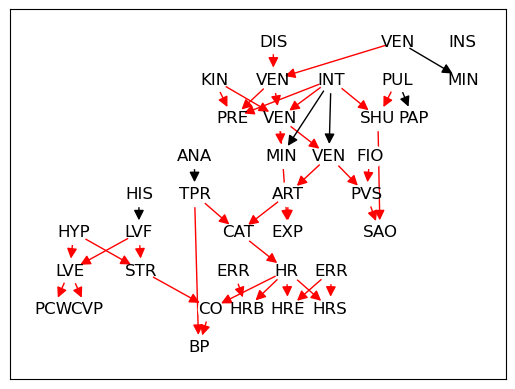

the time taken to learn the graph 3.762822151184082 seconds
False Positive =  [['ARTCO2', 'CATECHOL'], ['HR', 'HRSAT']]
False Negative =  [['MINVOL', 'INTUBATION'], ['KINKEDTUBE', 'VENTLUNG']]
The F-score is  0.9523809523809523
CPU times: total: 4.89 s
Wall time: 3.76 s


In [42]:
%%time
tic = time.time()
'''
score phase
'''
m = Gobnilp()
for i in k:
    m.add_forbidden_adjacency((i[0], i[1]))
                              
m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat", palim=3)

# m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link_testing.csv")
toc = time.time()
print('the time taken to learn the graph', toc - tic, 'seconds')
print('The F-score is ', F_score(m))

### Hepar2 - GOBNILP

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -327249.4984184264
**********
ChHepatitis<-injections,transfusion,vh_amn -5552.798764759034
injections<-choledocholithotomy,hospital,surgery -4957.732415147249
vh_amn<-hbsag_anti -4750.593665355365
transfusion<-choledocholithotomy,hospital -4274.756595791754
Cirrhosis<-Steatosis,fibrosis -1557.7585484415904
Steatosis<-alt -3259.0554074852553
fibrosis<-ChHepatitis -992.2782119339245
ESR<-ChHepatitis,PBC -6966.522638191505
PBC<-age,sex -4786.314893336028
Hyperbilirubinemia<-sex -2509.8902303594514
sex<- -6720.9207806503255
age<-Hyperbilirubinemia -11655.079025954896
RHepatitis<-phosphatase -1239.604110658358
phosphatase<-ChHepatitis,THepatitis -9736.290352844582
alt<-ChHepatitis -11767.903552451986
THepatitis<-as

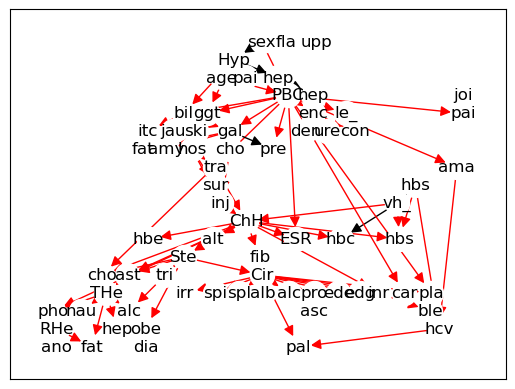

the time taken to learn the network is: 239.1098666191101 seconds
CPU times: total: 5min 46s
Wall time: 3min 59s


In [43]:
%%time
toc = time.time()

'''
score-based algorithm
'''
T = Gobnilp()
#score phase##
T.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat", palim=3)
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
#started at 3:45

### Hepar2 - Hybrid

In [45]:
%%time
'''
restrict phase
'''
toc = time.time()
k = PC_SL(df_hepar2, 1, 0.05)
tic = time.time()
print('the time taken to restrict edges is', tic - toc, 'seconds')

the number of restricted edges is : 2298
the time taken to restrict edges is 59.49784445762634 seconds
CPU times: total: 58.8 s
Wall time: 59.5 s


Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -327334.1116776089
**********
ChHepatitis<-injections -5767.479427985236
injections<-choledocholithotomy,hospital,surgery -4957.732415147249
Cirrhosis<-Steatosis,fibrosis -1557.7585484415904
Steatosis<-alt -3259.0554074852553
fibrosis<-ChHepatitis -992.2782119339245
ESR<-ChHepatitis,PBC -6966.522638191505
PBC<-age,sex -4786.314893336028
Hyperbilirubinemia<- -2551.554992929974
sex<-Hyperbilirubinemia -6679.256018079803
age<-Hyperbilirubinemia -11655.079025954896
RHepatitis<-phosphatase -1239.604110658358
phosphatase<-ChHepatitis,THepatitis -9736.290352844582
alt<-ChHepatitis -11767.903552451986
THepatitis<-ast -1610.4450303320773
ast<-ChHepatitis,Steatosis -10998.59915884029
albumin<-Cirrhosis -7093.001421160385

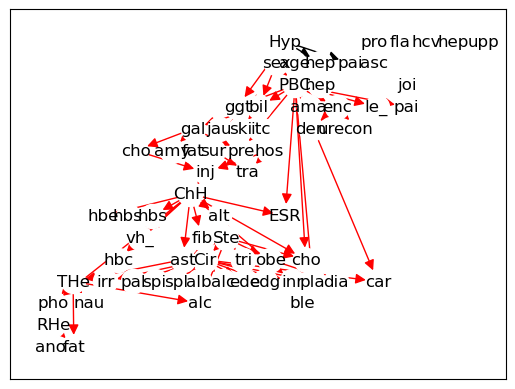

the time taken to learn the graph 8.475680112838745 seconds
False Positive =  [['cholesterol', 'ChHepatitis'], ['inr', 'ChHepatitis'], ['Steatosis', 'cholesterol']]
False Negative =  [['Cirrhosis', 'proteins'], ['PBC', 'gallstones'], ['hepatotoxic', 'THepatitis'], ['hepatotoxic', 'alcoholism'], ['alcoholism', 'obesity'], ['hcv_anti', 'ama'], ['bleeding', 'hcv_anti'], ['hbsag_anti', 'hcv_anti'], ['hcv_anti', 'palms'], ['surgery', 'hospital']]
The F-score is  0.9248554913294798
CPU times: total: 9.58 s
Wall time: 8.48 s


In [46]:
%%time
tic = time.time()
'''
score phase
'''
m = Gobnilp()
for i in k:
    m.add_forbidden_adjacency((i[0], i[1]))
                              
m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat", palim=3)

# m.learn(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link_testing.csv")
toc = time.time()
print('the time taken to learn the graph', toc - tic, 'seconds')
print('The F-score is ', F_score(m))